<a href="https://colab.research.google.com/github/outofray/Ultrasonography/blob/main/errorbar%20plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
filename = "gdrive/MyDrive/研究團隊暫時資料夾/ultrasound AI assistance.csv"

In [ ]:
df = pd.read_csv(filename)
df

In [14]:
subject_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [31]:
AI_mean = []
AI_std = []
for subject in subject_list:
  df_test = df[df['AI']==1]
  df_test = df_test[df_test['subject'] == subject]
  mean = df_test['time'].mean()
  std = df_test['time'].std()
  AI_mean.append(mean)
  AI_std.append(std)

print(AI_mean)
print(AI_std)

[121.66666666666667, 77.2, 56.333333333333336, 35.266666666666666, 22.6, 52.06666666666667, 30.733333333333334, 36.86666666666667, 37.93333333333333, 73.0]
[63.129873692103594, 63.34621422897232, 40.877284412646354, 42.506246039622845, 14.989520148614307, 55.51507731710197, 26.496540654709374, 32.07773296822817, 49.633609964370294, 50.00857069400347]


In [32]:
man_mean = []
man_std = []
for subject in subject_list:
  df_test = df[df['AI']==0]
  df_test = df_test[df_test['subject'] == subject]
  mean = df_test['time'].mean()
  std = df_test['time'].std()
  man_mean.append(mean)
  man_std.append(std)

print(man_mean)
print(man_std)

[89.13333333333334, 50.13333333333333, 66.53333333333333, 46.333333333333336, 19.266666666666666, 20.6, 29.933333333333334, 24.333333333333332, 23.266666666666666, 41.2]
[48.702987099160076, 48.73670758952298, 58.120400483659374, 50.693288745252296, 11.95507463480716, 10.99220503031905, 19.12166559790478, 10.834249045547752, 14.068539708292738, 35.71554283501792]


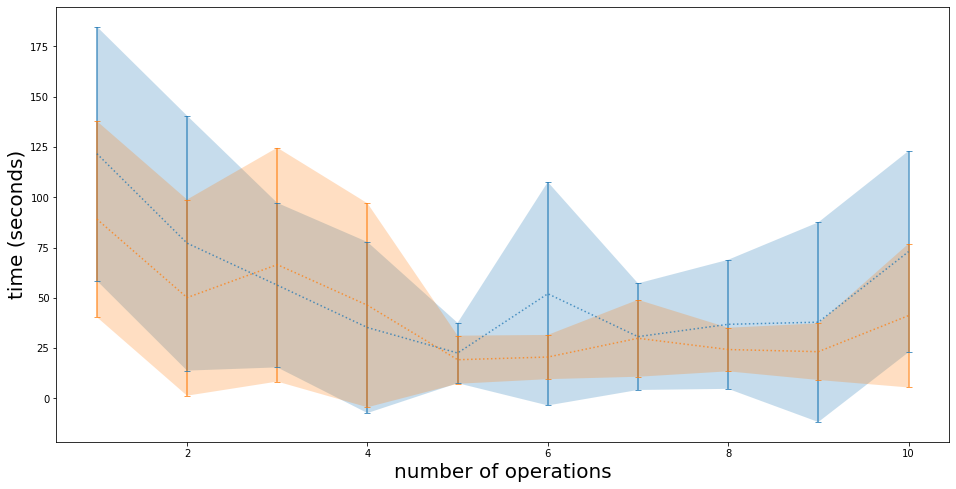

In [40]:
data_1 = {
    'x': list(range(1,11)),
    'y': AI_mean,
    'yerr': AI_std}
data_2 = {
    'x': list(range(1,11)),
    'y': man_mean,
    'yerr': man_std}

# plot
plt.figure(figsize=(16,8))

# errorbar + fill_between
plt.plot()
plt.xlabel('number of operations', fontsize=20)  
plt.ylabel('time (seconds)', fontsize=20) 

for data in [data_1, data_2]:
    plt.errorbar(**data, alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    plt.fill_between(**data, alpha=.25)